In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from google.colab import files
Data_files = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [2]:
dealer_df = pd.read_excel("Dataset.xlsx", sheet_name = "Dealers")
Customers_df = pd.read_excel("Dataset.xlsx", sheet_name = "Customers")
Claims_df = pd.read_excel("Dataset.xlsx", sheet_name = "Claims")
Parts_df = pd.read_excel("Dataset.xlsx", sheet_name = "Parts")
Transactions_df = pd.read_excel("Dataset.xlsx", sheet_name = "Transactions")
Vendor_df = pd.read_excel("Dataset.xlsx", sheet_name = "Vendors")

In [3]:
Parts_df.head()

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19


In [4]:
Claims_df.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr


In [8]:
Customers_df.head()

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,ZipCode
0,101,pushpak,1,ind,goa,panaji,402201
1,102,raj,3,ind,karnataka,banglore,403315
2,103,ranbir,4,ind,gujrat,ahemadabad,326665
3,104,reyansh,5,ind,orrisa,cuttack,543211
4,105,raunak,2,ind,delhi,noida,426232


In [7]:
dealer_df.head()

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,Kenneth Schmitt,india,Goa,Panji,400001
1,2,Owen Mclaughlin,india,Delhi,Naoida,400002
2,3,Donald Repinski,india,Karnataka,Bangalore,400003
3,4,Rachel Oszust,india,Gujrat,Ahemdabad,400004
4,5,Lynn Knapp,india,Orrisa,Cuttack,400005


In [5]:
# for 10 top  dealers 
x = Claims_df["Dealer_ID"].value_counts()
x.head(10)

5       971
2       922
1       922
3       922
6       394
4       218
1990    176
1237    176
1236    176
1252    176
Name: Dealer_ID, dtype: int64

In [6]:
# most defective parts claimed
Claims_df["Part_ID"].value_counts().head(10)

906    4019
905    3349
901    3349
907    3348
904    2010
903    2010
902    2010
Name: Part_ID, dtype: int64

In [9]:
Claims_df.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr


In [10]:
Parts_df.head()

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19


In [11]:
Transactions_df.head()


,transaction_id,claim_id,transaction_date,transaction_amount
0,101,1,2020-04-01,36000
1,102,2,2020-04-01,42000
2,103,3,2020-04-01,45000
3,104,4,2020-04-01,56000
4,105,5,2020-04-01,39000


In [12]:
Vendor_df.head()

,Vendor_ID,Name,Country,State,City,ZIpCode
0,501,Advik,ind,goa,panaji,400001
1,502,Rudra,ind,delhi,noida,400002
2,503,Aayansh,ind,karnataka,banglore,400003
3,504,Adinew,ind,gujrat,ahemadabad,400004
4,505,Dhruv,ind,orrisa,cuttack,400005


In [21]:
# 2) Predict the parts that may fail according to the location, mileage and age:
# Assumptions and note - Make to order scheme is applied for production, ,it's not possible to calculate mileage as 
# per available data thus it is assumed that part failure is independent of mileage 

In [99]:
mergedclaim_transaction = pd.merge(Claims_df,Transactions_df, how = 'left',on ='claim_id')
mergedclaim_transaction.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,transaction_id,transaction_date,transaction_amount
0,1,2020-04-01,36000,5,104,901,rpr,101,2020-04-01,36000
1,2,2020-04-01,42000,6,106,902,rplc,102,2020-04-01,42000
2,3,2020-04-01,45000,4,103,903,rpr,103,2020-04-01,45000
3,4,2020-04-01,56000,3,102,904,rplc,104,2020-04-01,56000
4,5,2020-04-01,39000,2,105,905,rpr,105,2020-04-01,39000


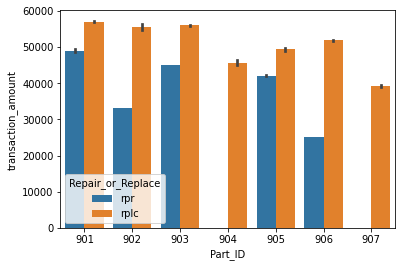

In [100]:
sns.barplot(x="Part_ID",y = 'transaction_amount',hue ='Repair_or_Replace',data = mergedclaim_transaction)

In [178]:
# for location it is assumed that vendor location is the best choice
mergedclaim_transaction["Vendor_Location"] = mergedclaim_transaction['Dealer_ID'].map(dealer_df['City'])
mergedclaim_transaction.head()


,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,transaction_id,transaction_date,transaction_amount,Part_Name,Manufacturer_ID,Manf_Date,Age,Vendor_Location_Bangalore,Vendor_Location_Cuttack,Vendor_Location_Mumbai,Vendor_Location_Naoida,Vendor_Location_Panji,Repair_or_Replace_rpr,Vendor_Location
0,1,2020-04-01,36000,5,104,901,101,2020-04-01,36000,brake pad,501,1996-08-12,8633,0,0,1,0,0,1,Mumbai
1,2,2020-04-01,42000,6,106,902,102,2020-04-01,42000,axle,502,1997-03-03,8430,0,0,0,0,1,0,Panji
2,3,2020-04-01,45000,4,103,903,103,2020-04-01,45000,tie rod,503,1997-06-13,8328,0,1,0,0,0,1,Cuttack
3,4,2020-04-01,56000,3,102,904,104,2020-04-01,56000,differential,504,1997-01-14,8478,0,0,0,0,0,0,Ahemdabad
4,5,2020-04-01,39000,2,105,905,105,2020-04-01,39000,rear suspension,505,1996-08-19,8626,1,0,0,0,0,1,Bangalore


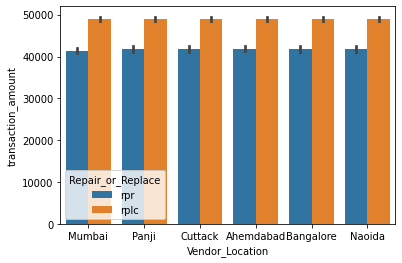

In [102]:
sns.barplot(y='transaction_amount',x = 'Vendor_Location',hue = 'Repair_or_Replace',data = mergedclaim_transaction)

In [177]:
mergedclaim_transaction.groupby("City)['Part_ID'].value_counts().head()

SyntaxError: ignored

In [103]:
mergedclaim_transaction = pd.merge(mergedclaim_transaction,Parts_df,how ='left',on ='Part_ID')

In [104]:
mergedclaim_transaction['Age'] = mergedclaim_transaction['claim_date'] - mergedclaim_transaction['Manf_Date'] 

In [105]:
mergedclaim_transaction

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,transaction_id,transaction_date,transaction_amount,Vendor_Location,Part_Name,Manufacturer_ID,Manf_Date,Age
0,1,2020-04-01,36000,5,104,901,rpr,101,2020-04-01,36000,Mumbai,brake pad,501,1996-08-12,8633 days
1,2,2020-04-01,42000,6,106,902,rplc,102,2020-04-01,42000,Panji,axle,502,1997-03-03,8430 days
2,3,2020-04-01,45000,4,103,903,rpr,103,2020-04-01,45000,Cuttack,tie rod,503,1997-06-13,8328 days
3,4,2020-04-01,56000,3,102,904,rplc,104,2020-04-01,56000,Ahemdabad,differential,504,1997-01-14,8478 days
4,5,2020-04-01,39000,2,105,905,rpr,105,2020-04-01,39000,Bangalore,rear suspension,505,1996-08-19,8626 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,20091,2021-01-24,53000,Cuttack,radiator,506,1997-03-24,8707 days
20091,20092,2021-01-24,36000,1275,43975,907,rplc,20092,2021-01-24,36000,Mumbai,clutch kits,503,1997-05-12,8658 days
20092,20093,2021-01-24,46000,1276,43976,905,rplc,20093,2021-01-24,46000,Panji,rear suspension,505,1996-08-19,8924 days
20093,20094,2021-01-24,56000,1277,43977,904,rplc,20094,2021-01-24,56000,Naoida,differential,504,1997-01-14,8776 days


In [106]:
import datetime 
mergedclaim_transaction["Age"] = mergedclaim_transaction["Age"].apply(lambda x: x.days)

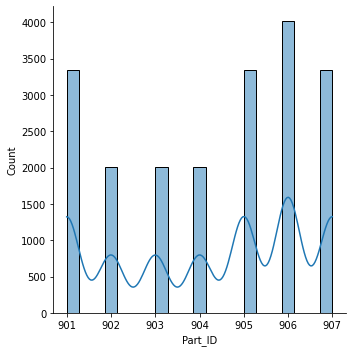

In [107]:
sns.displot(mergedclaim_transaction['Part_ID'],kde =True)

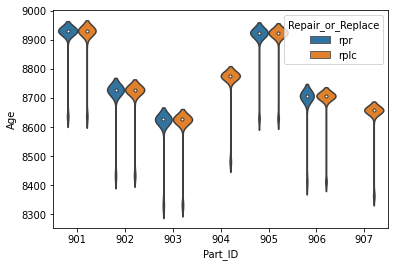

In [108]:
sns.violinplot(y='Age',x = 'Part_ID',hue = 'Repair_or_Replace',data = mergedclaim_transaction)

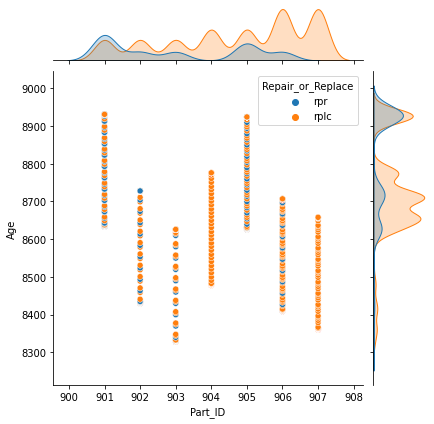

In [109]:
sns.jointplot(y='Age',x = 'Part_ID',hue = 'Repair_or_Replace',data = mergedclaim_transaction)

In [123]:
mergedclaim_transaction =pd.get_dummies(mergedclaim_transaction,columns = ["Vendor_Location","Repair_or_Replace"],drop_first = True)
mergedclaim_transaction

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,transaction_id,transaction_date,transaction_amount,Part_Name,Manufacturer_ID,Manf_Date,Age,Vendor_Location_Bangalore,Vendor_Location_Cuttack,Vendor_Location_Mumbai,Vendor_Location_Naoida,Vendor_Location_Panji,Repair_or_Replace_rpr
0,1,2020-04-01,36000,5,104,901,101,2020-04-01,36000,brake pad,501,1996-08-12,8633,0,0,1,0,0,1
1,2,2020-04-01,42000,6,106,902,102,2020-04-01,42000,axle,502,1997-03-03,8430,0,0,0,0,1,0
2,3,2020-04-01,45000,4,103,903,103,2020-04-01,45000,tie rod,503,1997-06-13,8328,0,1,0,0,0,1
3,4,2020-04-01,56000,3,102,904,104,2020-04-01,56000,differential,504,1997-01-14,8478,0,0,0,0,0,0
4,5,2020-04-01,39000,2,105,905,105,2020-04-01,39000,rear suspension,505,1996-08-19,8626,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,20091,2021-01-24,53000,radiator,506,1997-03-24,8707,0,1,0,0,0,0
20091,20092,2021-01-24,36000,1275,43975,907,20092,2021-01-24,36000,clutch kits,503,1997-05-12,8658,0,0,1,0,0,0
20092,20093,2021-01-24,46000,1276,43976,905,20093,2021-01-24,46000,rear suspension,505,1996-08-19,8924,0,0,0,0,1,0
20093,20094,2021-01-24,56000,1277,43977,904,20094,2021-01-24,56000,differential,504,1997-01-14,8776,0,0,0,1,0,0


In [124]:
mergedclaim_transaction.columns

Index(['claim_id', 'claim_date', 'claim_amount', 'Dealer_ID', 'Cust_ID',
       'Part_ID', 'transaction_id', 'transaction_date', 'transaction_amount',
       'Part_Name', 'Manufacturer_ID', 'Manf_Date', 'Age',
       'Vendor_Location_Bangalore', 'Vendor_Location_Cuttack',
       'Vendor_Location_Mumbai', 'Vendor_Location_Naoida',
       'Vendor_Location_Panji', 'Repair_or_Replace_rpr'],
      dtype='object')

In [127]:
# predicting part falure 
x=mergedclaim_transaction[['Part_ID','Age','Vendor_Location_Bangalore','Vendor_Location_Cuttack','Vendor_Location_Mumbai','Vendor_Location_Naoida','Vendor_Location_Panji']]
y=mergedclaim_transaction['Repair_or_Replace_rpr']

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,x,y,cv=10,scoring='accuracy').mean()

0.7639220274931959

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()

0.7359561822544818

In [ ]:
#usercase- 3  To determine whether the defective part is to be replaced or repaired:
# in the current senerio age and location and transaction amount can be taken as parameters to propose model  

In [135]:
x1 = mergedclaim_transaction[['Part_ID','Age','Vendor_Location_Bangalore','Vendor_Location_Cuttack','Vendor_Location_Mumbai','Vendor_Location_Naoida','Vendor_Location_Panji','transaction_amount']]
y1 = mergedclaim_transaction['Repair_or_Replace_rpr']                               

In [136]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,x1,y1,cv=10,scoring='accuracy').mean()

0.9894029850746268

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
cross_val_score(rfc,x1,y1,cv=10,scoring='accuracy').mean()

0.9891542288557215

In [139]:
# Usecase - 5 Processing of variety of data:
Claims_df

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr
...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc
20091,20092,2021-01-24,36000,1275,43975,907,rplc
20092,20093,2021-01-24,46000,1276,43976,905,rplc
20093,20094,2021-01-24,56000,1277,43977,904,rplc


In [172]:
all = pd.merge(Claims_df,dealer_df, on ="Dealer_ID",how ='left' )
all.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,2020-04-01,36000,5,104,901,rpr,Lynn Knapp,india,Orrisa,Cuttack,400005
1,2,2020-04-01,42000,6,106,902,rplc,Harold Hamff,india,Maharashtra,Mumbai,400006
2,3,2020-04-01,45000,4,103,903,rpr,Rachel Oszust,india,Gujrat,Ahemdabad,400004
3,4,2020-04-01,56000,3,102,904,rplc,Donald Repinski,india,Karnataka,Bangalore,400003
4,5,2020-04-01,39000,2,105,905,rpr,Owen Mclaughlin,india,Delhi,Naoida,400002


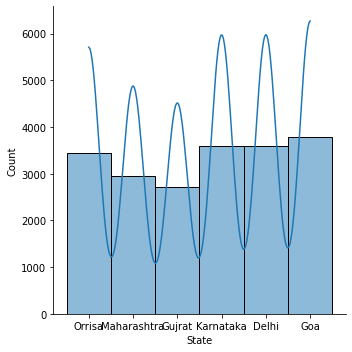

In [173]:
sns.displot(all['State'],kde =True)

In [174]:
all = pd.get_dummies(all, columns=['Repair_or_Replace','State'],drop_first=True)

In [175]:
all.corr()


,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,ZIpCode,Repair_or_Replace_rpr,State_Goa,State_Gujrat,State_Karnataka,State_Maharashtra,State_Orrisa
claim_id,1.000000,0.000214,0.002988,-0.000791,0.000189,0.000158,-0.000169,0.000002,0.000421,-0.000329,0.000145,-0.000085
claim_amount,0.000214,1.000000,-0.000154,-0.001481,-0.285543,-0.001569,-0.264751,0.000157,0.000091,0.001947,0.000472,-0.003632
Dealer_ID,0.002988,-0.000154,1.000000,0.007710,-0.002561,0.066264,0.000630,-0.014101,0.114150,-0.092952,0.099579,-0.066521
Cust_ID,-0.000791,-0.001481,0.007710,1.000000,0.002312,-0.004365,-0.001301,0.001977,-0.006923,0.004214,-0.002884,0.000433
Part_ID,0.000189,-0.285543,-0.002561,0.002312,1.000000,-0.002952,-0.364181,0.003273,0.001491,-0.003587,-0.000393,-0.002541
ZIpCode,0.000158,-0.001569,0.066264,-0.004365,-0.002952,1.000000,0.000325,-0.663095,0.147370,-0.098645,0.637278,0.434479
Repair_or_Replace_rpr,-0.000169,-0.264751,0.000630,-0.001301,-0.364181,0.000325,1.000000,0.001422,-0.000059,0.003855,-0.003050,0.003527
State_Goa,0.000002,0.000157,-0.014101,0.001977,0.003273,-0.663095,0.001422,1.000000,-0.190569,-0.224982,-0.199344,-0.218871
State_Gujrat,0.000421,0.000091,0.114150,-0.006923,0.001491,0.147370,-0.000059,-0.190569,1.000000,-0.185052,-0.163965,-0.180026
State_Karnataka,-0.000329,0.001947,-0.092952,0.004214,-0.003587,-0.098645,0.003855,-0.224982,-0.185052,1.000000,-0.193574,-0.212535


In [182]:
x2 = all[['Part_ID','State_Goa','State_Gujrat','State_Karnataka','State_Maharashtra','State_Orrisa']]
y2 = all['Repair_or_Replace_rpr'] 

In [183]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
cross_val_score(classifier,x2,y2,cv=10,scoring='accuracy').mean()

0.7666085946573752